In [1]:
number_of_particles = 200
height = 70
width = 20
depth = 1
gravity = 5
cr = (1.15 + 0.85) / 2
exp = "2D"

In [2]:
Ds = [
    3,
    4,
    5,
    6
]

In [3]:
static_files = [
    "./simulations/static-w_15-D_3.txt",
    "./simulations/static-w_15-D_4.txt",
    "./simulations/static-w_15-D_5.txt",
    "./simulations/static-w_15-D_6.txt"
]

In [4]:
from simulation_parser import parse_static_file

In [5]:
import numpy as np

In [6]:
crs = []
for i in range(len(static_files)):
    static_file = static_files[i]
    static_info = parse_static_file(static_file)
    radii = np.array(static_info.radii)
    cr = radii.mean()
    crs.append(cr)

In [7]:
crs = np.array(crs)
cr = round(crs.mean(), 2)
cr

1.0

In [8]:
from beverloo import get_beverloo_function

In [9]:
beverloo_function = get_beverloo_function(height, width, depth, number_of_particles, gravity, exp, cr)

In [10]:
from min_sqrs import perform_regression, min_sqrs, plot_regression_data

In [11]:
X = np.array(Ds) #replace with Qs
Y = np.array(Ds)

In [12]:
F = [beverloo_function]

In [13]:
Ks = min_sqrs(X, F, Y)

In [14]:
k = Ks.item()
k

1.9055761575968175

In [15]:
k_int = (0, k*2)

In [16]:
Ks = np.arange(k_int[0], k_int[1] + 0.001, 0.001)

In [17]:
min_f, reg_data, _ = perform_regression(X, Ks, lambda D, c : c*beverloo_function(D), Y)

In [18]:
best_k = round(reg_data.Ks[reg_data.best_k_idx], 3)
best_k

1.906

In [19]:
beverloo_adjusted = lambda D: best_k*beverloo_function(D)

In [20]:
O = beverloo_adjusted(X)
O

array([1.72208606, 3.16367411, 4.87079493, 6.80714286])

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Caudal')

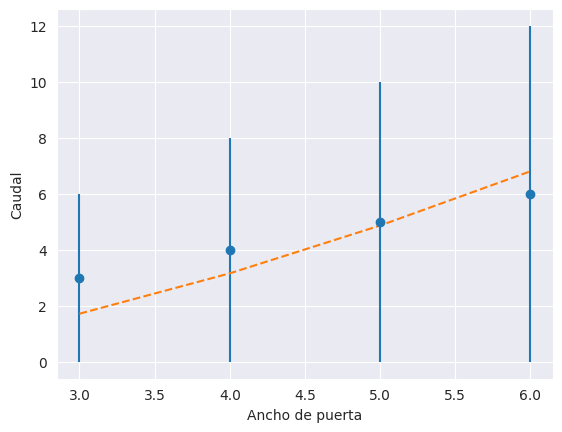

In [22]:
sns.set_style("darkgrid")
plt.errorbar(X, Y, yerr=Y, fmt='o')
plt.plot(X, O, linestyle="--")
plt.xlabel("Ancho de puerta")
plt.ylabel("Caudal")

In [23]:
for i in range(len(reg_data.Ks)):
    reg_data.Ks[i] = round(reg_data.Ks[i], 3)

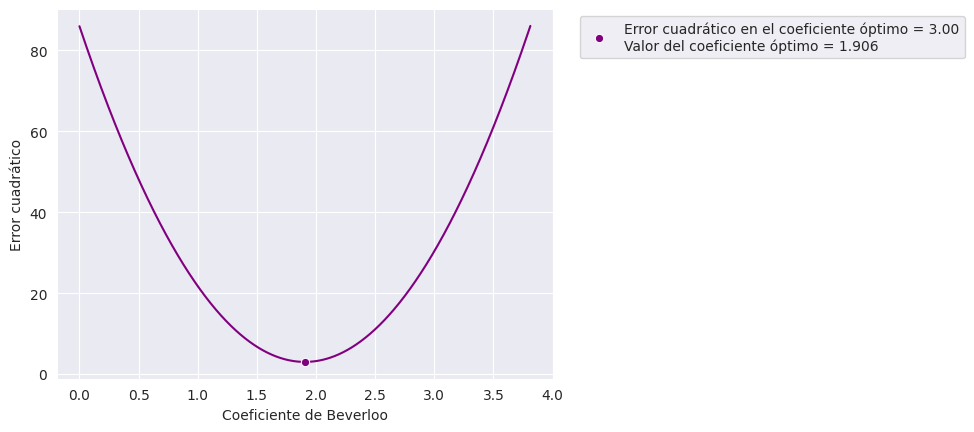

In [24]:
plot_regression_data(reg_data, "beverloo_err.png", "Coeficiente de Beverloo")